### Import Library

In [1]:
from scipy.io import loadmat
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### Import Dataset Metadata

In [2]:
raw_data = loadmat("./wiki/wiki.mat")

In [3]:
wiki_data = raw_data['wiki']

In [4]:
wiki_data.dtype

dtype([('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O')])

### Extract the Data into List

In [5]:
full_path = np.array(list(map(lambda x: x[0], wiki_data['full_path'][0][0][0])))
full_path

array(['17/10000217_1981-05-05_2009.jpg',
       '48/10000548_1925-04-04_1964.jpg', '12/100012_1948-07-03_2008.jpg',
       ..., '09/9998109_1972-12-27_2013.jpg',
       '00/9999400_1981-12-13_2011.jpg', '80/999980_1954-06-11_2008.jpg'],
      dtype='<U37')

In [6]:
gender = wiki_data['gender'][0][0][0]
gender

array([1., 1., 1., ..., 1., 1., 0.])

In [7]:
dob = np.array(list(map(lambda x: datetime.fromordinal(x), wiki_data['dob'][0][0][0]))) 

photo_taken = np.array(list(map(lambda x: datetime(x, 1, 1), wiki_data['photo_taken'][0][0][0]))) 

In [8]:
age = np.array(list(map(lambda x: int(x.days / 365.2425), photo_taken - dob))) 

### Create Pandas Dataframe

In [9]:
df = pd.DataFrame({
    "image_path": full_path,
    "gender": gender,
    "age": age,
})

### Randomly Plot Images

path: ./wiki/93/2122293_1957-04-24_2014.jpg | size: 291280
Age: 55 | Gender: 1.0


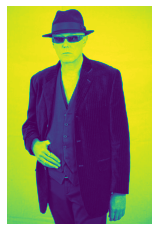

path: ./wiki/46/44038646_1952-06-12_1973.jpg | size: 4
Age: 19 | Gender: nan


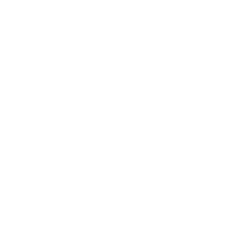

path: ./wiki/44/615844_1977-10-15_2012.jpg | size: 140580
Age: 33 | Gender: 1.0


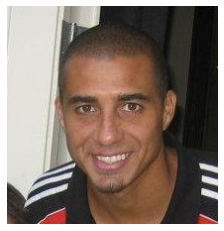

path: ./wiki/75/3075_1947-07-22_2011.jpg | size: 840840
Age: 62 | Gender: 1.0


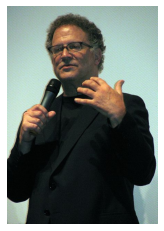

path: ./wiki/35/5991035_1952-03-04_2012.jpg | size: 728640
Age: 58 | Gender: 1.0


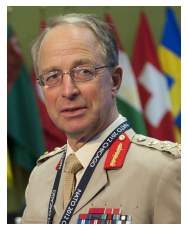

path: ./wiki/27/41501227_1992-02-05_2013.jpg | size: 582120
Age: 19 | Gender: 0.0


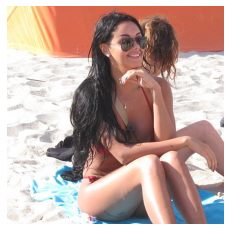

path: ./wiki/64/34939264_1988-09-16_2012.jpg | size: 4
Age: 22 | Gender: 1.0


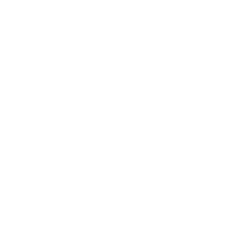

path: ./wiki/86/44068586_1989-02-17_2011.jpg | size: 386760
Age: 20 | Gender: 1.0


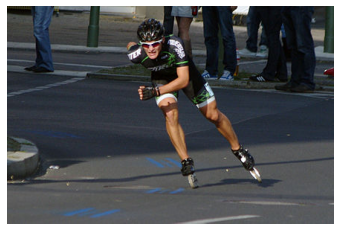

path: ./wiki/86/3224486_1955-08-19_1989.jpg | size: 412800
Age: 32 | Gender: 0.0


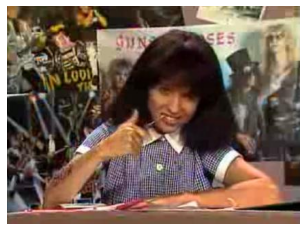

path: ./wiki/92/38760792_1960-12-09_2011.jpg | size: 386760
Age: 49 | Gender: 1.0


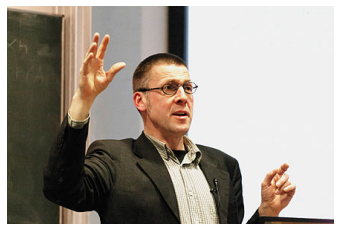

In [10]:
from random import randint

for _ in range(10):
    i = randint(0, 62328)
    
    img = plt.imread(f"./wiki/{df['image_path'][i]}")
    print(f"path: ./wiki/{df['image_path'][i]} | size: {img.size}")
    print(f"Age: {df['age'][i]} | Gender: {df['gender'][i]}")
    
    plt.figure(i)
    plt.imshow(img)
    plt.axis("off")
    plt.plot()
    plt.show()

### Remove NA Values

In [11]:
print("Find null values:")
print("image_path:", df['image_path'].isna().sum())
print("gender:", df['gender'].isna().sum())
print("age:", df['age'].isna().sum())

Find null values:
image_path: 0
gender: 2643
age: 0


In [12]:
print("Original shape:", df.shape)
df = df.dropna()
print("After dropna shape:", df.shape)

Original shape: (62328, 3)
After dropna shape: (59685, 3)


### Describe each Pandas Series

In [13]:
df['image_path'].describe()

count                               59685
unique                              59685
top       17/10000217_1981-05-05_2009.jpg
freq                                    1
Name: image_path, dtype: object

In [14]:
df['gender'].describe()

count    59685.000000
mean         0.788523
std          0.408359
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

In [15]:
df['age'].describe()

count    59685.000000
mean        35.581955
std         24.040102
min        -75.000000
25%         22.000000
50%         29.000000
75%         45.000000
max       1994.000000
Name: age, dtype: float64

### Remove Record with Invalid Image

In [16]:
def checkValidity(x):
    try:
        img = plt.imread(f"./wiki/{x}")
    except:
        return False
    return img.shape[0] > 100

valid_image = df['image_path'].apply(checkValidity)

c:\Users\tanch\Desktop\Chee Lam\SEM VI\FYP\pytorch_env\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


In [17]:
df = df[valid_image]

### Remove Invalid Age

In [18]:
def valid_age(x):
    return x > 0 and x < 100

valid_age = df['age'].apply(valid_age)

In [19]:
df = df[valid_age]

In [20]:
df['age'].describe()

count    51837.000000
mean        35.720296
std         16.439885
min          1.000000
25%         23.000000
50%         30.000000
75%         46.000000
max         99.000000
Name: age, dtype: float64

In [21]:
df.shape

(51837, 3)

### Export Dataframe

In [22]:
df.to_csv("preprocessed_data.csv", index=False)